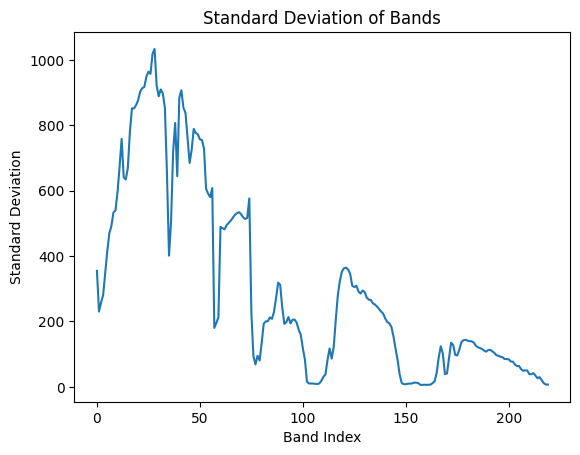

The band with maximum information is Band 29


In [ ]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load Indian Pines dataset from MATLAB file
indian_pines_data = loadmat('/content/Indian_pines.mat')  # Update the path
indian_pines = indian_pines_data['indian_pines']  # Adjust based on the structure of your .mat file

# Reshape the data to (num_pixels, num_bands) for easier computation
reshaped_data = np.reshape(indian_pines, (indian_pines.shape[0] * indian_pines.shape[1], indian_pines.shape[2]))

# Calculate the standard deviation for each band
band_std_dev = np.std(reshaped_data, axis=0)

# Find the band with the maximum standard deviation
max_info_band = np.argmax(band_std_dev)

# Plot the standard deviation values for each band
plt.plot(band_std_dev)
plt.xlabel('Band Index')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Bands')
plt.show()

print(f"The band with maximum information is Band {max_info_band + 1}")  # Adding 1 to convert from 0-based to 1-based index

In [ ]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load Indian Pines dataset from MATLAB file
indian_pines_data = loadmat('/content/Indian_pines.mat')  # Update the path
keys = indian_pines_data.keys()

print(keys)
print(indian_pines_data)

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines'])
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:20:38 2011', '__version__': '1.0', '__globals__': [], 'indian_pines': array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [2580, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [2570, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[2576, 4388, 4334, ..., 1030, 1006, 1015],
        [2747, 4264, 4592, ..., 1039, 1015, 1020],
        [2750, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [2744, 4268, 4597, ..., 1019, 1016, 1010]],

       [[2744, 4146, 4416, ..., 1029, 1025, 1010],
        [2576, 4389, 4416, ..., 1021, 1011, 1000],
        [2744, 4273, 4420, ...,

Lacunarity for Band 29 is: 848876.8917820124


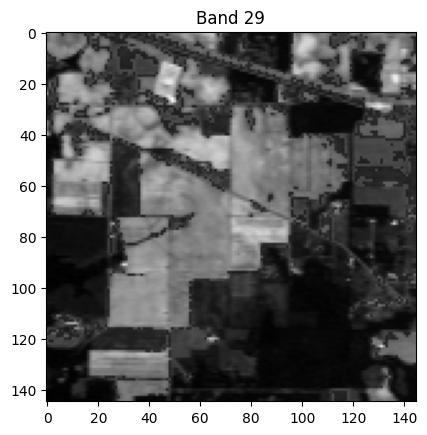

In [ ]:
import numpy as np
from scipy.ndimage import variance
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load Indian Pines dataset from MATLAB file
indian_pines_data = loadmat('/content/Indian_pines.mat')  # Update the path
indian_pines = indian_pines_data['indian_pines']

# Extract band 29
band_29 = indian_pines[:, :, 29]

# Calculate the lacunarity using variance
lacunarity_value = variance(band_29)

print(f"Lacunarity for Band 29 is: {lacunarity_value}")

# Display the band for visualization
plt.imshow(band_29, cmap='gray')
plt.title('Band 29')
plt.show()

Gliding Box Lacunarity for Band 29 with box size 2: -0.13866453109218968
Gliding Box Lacunarity for Band 29 with box size 4: 0.06863464783730472
Gliding Box Lacunarity for Band 29 with box size 8: 0.6123252226348093
Gliding Box Lacunarity for Band 29 with box size 16: 0.1443313623030605
Gliding Box Lacunarity for Band 29 with box size 32: -1.2332023781315777


<ipython-input-4-8c9e5525c499>:59: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(box_sizes) + 1, i+2)


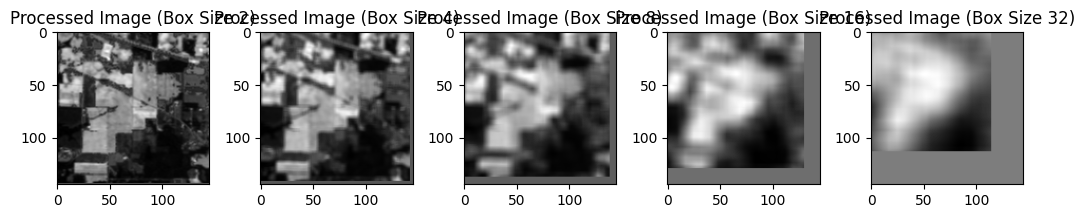

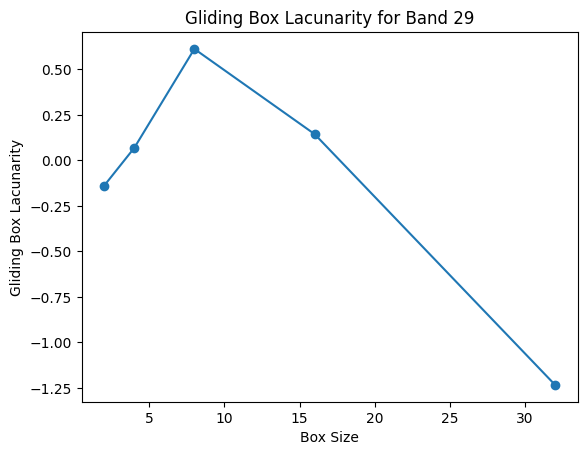

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler

# Load Indian Pines dataset from MATLAB file
indian_pines_data = loadmat('/content/Indian_pines.mat')  # Update the path
indian_pines = indian_pines_data['indian_pines']  # Adjust based on the structure of your .mat file

# Select band 29
band_number = 29
selected_band = indian_pines[:, :, band_number]

# Normalize the data
selected_band_normalized = StandardScaler().fit_transform(selected_band.reshape(-1, 1)).reshape(selected_band.shape)

# Set up Lacunarity Distribution Algorithm parameters
box_sizes = [2, 4, 8, 16, 32]

# Implement Gliding Box Lacunarity Distribution Algorithm
def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:  # Exclude background label
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)/np.mean(unique_labels)
                processed_image[i, j] = np.mean(sub_img)  # Processed image: example using mean

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images

# Apply the algorithm to the selected band
lacunarity_values, processed_images = gliding_box_lacunarity(selected_band_normalized, box_sizes)

# Display lacunarity values for each box size
for i, size in enumerate(box_sizes):
    print(f"Gliding Box Lacunarity for Band {band_number} with box size {size}: {lacunarity_values[i]}")

# Display the original band for reference
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(selected_band_normalized, cmap='gray')
plt.title(f'Original Band {band_number}')

# Display the processed images
# Display the processed images
for i, size in enumerate(box_sizes):
    plt.subplot(1, len(box_sizes) + 1, i+2)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title(f'Processed Image (Box Size {size})')

plt.tight_layout()
plt.show()

# Display lacunarity values
plt.plot(box_sizes, lacunarity_values, marker='o')
plt.xlabel('Box Size')
plt.ylabel('Gliding Box Lacunarity')
plt.title(f'Gliding Box Lacunarity for Band {band_number}')
plt.show()

Gliding Box Lacunarity for Band 29 with box size 2: 0.06467894827946837
Gliding Box Lacunarity for Band 29 with box size 4: 0.15048221036900394
Gliding Box Lacunarity for Band 29 with box size 8: 0.26636367127758565
Gliding Box Lacunarity for Band 29 with box size 16: 0.38046311734560284
Gliding Box Lacunarity for Band 29 with box size 32: 0.4164751413559235


<ipython-input-5-8d6c5c1fdd74>:58: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(box_sizes) + 1, i+2)


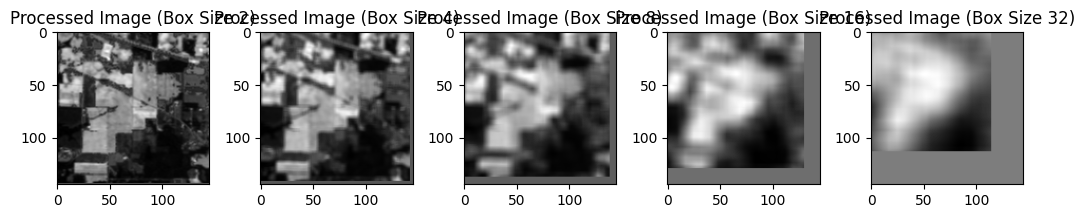

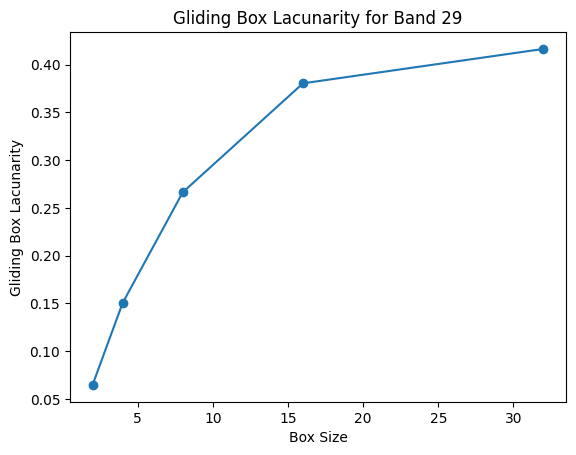

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler

# Load Indian Pines dataset from MATLAB file
indian_pines_data = loadmat('/content/Indian_pines.mat')  # Update the path
indian_pines = indian_pines_data['indian_pines']  # Adjust based on the structure of your .mat file

# Select band 29
band_number = 29
selected_band = indian_pines[:, :, band_number]

# Normalize the data
selected_band_normalized = StandardScaler().fit_transform(selected_band.reshape(-1, 1)).reshape(selected_band.shape)

# Set up Gliding Box Lacunarity Distribution Algorithm parameters
box_sizes = [2, 4, 8, 16, 32]

# Implement Gliding Box Lacunarity Distribution Algorithm
def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:  # Exclude background label
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)  # Using variance for lacunarity
                processed_image[i, j] = np.mean(sub_img)  # Processed image: example using mean

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images

# Apply the algorithm to the selected band
lacunarity_values, processed_images = gliding_box_lacunarity(selected_band_normalized, box_sizes)

# Display lacunarity values for each box size
for i, size in enumerate(box_sizes):
    print(f"Gliding Box Lacunarity for Band {band_number} with box size {size}: {lacunarity_values[i]}")

# Display the original band for reference
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(selected_band_normalized, cmap='gray')
plt.title(f'Original Band {band_number}')

# Display the processed images
for i, size in enumerate(box_sizes):
    plt.subplot(1, len(box_sizes) + 1, i+2)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title(f'Processed Image (Box Size {size})')

plt.tight_layout()
plt.show()

# Display lacunarity values
plt.plot(box_sizes, lacunarity_values, marker='o')
plt.xlabel('Box Size')
plt.ylabel('Gliding Box Lacunarity')
plt.title(f'Gliding Box Lacunarity for Band {band_number}')
plt.show()

In [ ]:
print(selected_band)

[[3991 4452 4595 ... 3215 3198 3282]
 [3828 4258 4459 ... 3935 3869 3886]
 [3775 4141 4304 ... 3666 2720 2610]
 ...
 [2073 2073 2104 ... 2208 2190 2198]
 [2090 2097 2099 ... 2166 2164 2189]
 [2054 2082 2073 ... 2198 2184 2187]]


In [ ]:
pip install numpy opencv-python

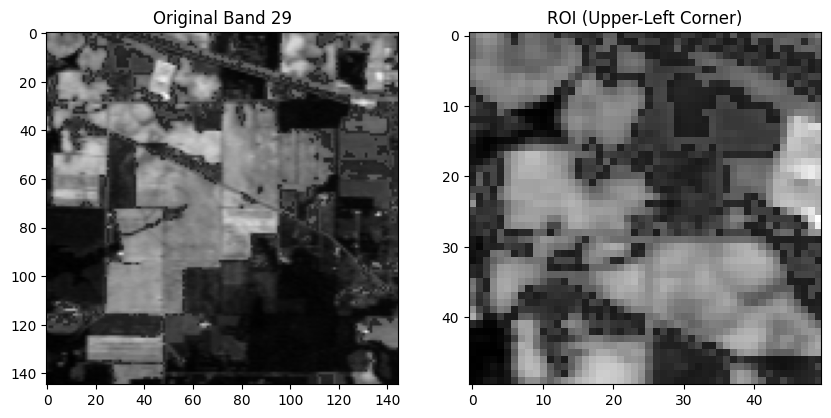

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load Indian Pines dataset from MATLAB file
indian_pines_data = loadmat('/content/Indian_pines.mat')  # Update the path
indian_pines = indian_pines_data['indian_pines']  # Adjust based on the structure of your .mat file

# Select band 29
band_number = 29
band_29 = indian_pines[:, :, band_number]

# Define ROI parameters (top-left corner coordinates and dimensions)
x, y, roi_width, roi_height = 0, 0, 50, 50  # Adjust these values based on your requirements

# Extract the ROI using NumPy array slicing
roi = band_29[y:y+roi_height, x:x+roi_width]

# Display the original Band 29 image and the extracted ROI
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(band_29, cmap='gray')
plt.title('Original Band 29')

plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('ROI (Upper-Left Corner)')

plt.show()

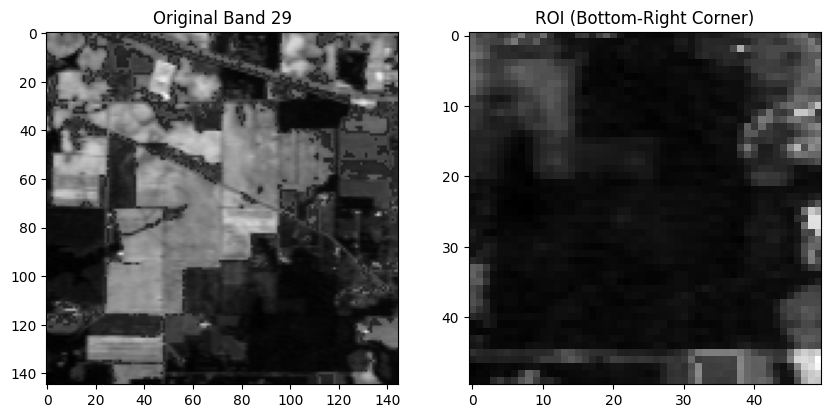

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load Indian Pines dataset from MATLAB file
indian_pines_data = loadmat('/content/Indian_pines.mat')  # Update the path
indian_pines = indian_pines_data['indian_pines']  # Adjust based on the structure of your .mat file

# Select band 29
band_number = 29
band_29 = indian_pines[:, :, band_number]

# Define ROI parameters (top-left corner coordinates and dimensions)
x, y, roi_width, roi_height = 80, 95, 50, 50  # Adjust these values based on your requirements

# Extract the ROI using NumPy array slicing
roi = band_29[y:y+roi_height, x:x+roi_width]

# Display the original Band 29 image and the extracted ROI
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(band_29, cmap='gray')
plt.title('Original Band 29')

plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('ROI (Bottom-Right Corner)')

plt.show()

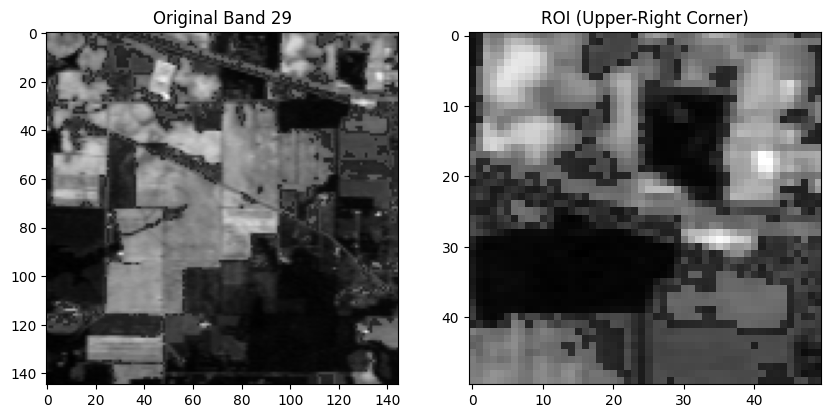

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load Indian Pines dataset from MATLAB file
indian_pines_data = loadmat('/content/Indian_pines.mat')  # Update the path
indian_pines = indian_pines_data['indian_pines']  # Adjust based on the structure of your .mat file

# Select band 29
band_number = 29
band_29 = indian_pines[:, :, band_number]

# Get the dimensions of the dataset
height, width = band_29.shape

# Define ROI parameters for the upper-right corner
roi_width, roi_height = 50, 50  # Adjust these values based on your requirements
x = width - roi_width
y = 0

# Extract the ROI using NumPy array slicing
roi = band_29[y:y+roi_height, x:x+roi_width]

# Display the original Band 29 image and the extracted ROI
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(band_29, cmap='gray')
plt.title('Original Band 29')

plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('ROI (Upper-Right Corner)')

plt.show()

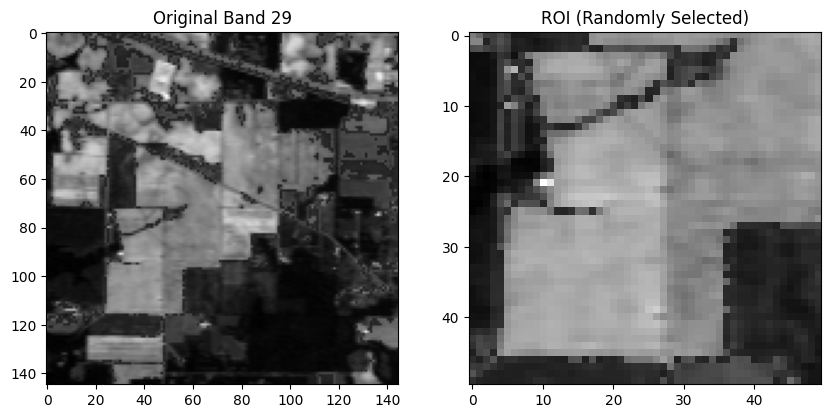

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load Indian Pines dataset from MATLAB file
indian_pines_data = loadmat('/content/Indian_pines.mat')  # Update the path
indian_pines = indian_pines_data['indian_pines']  # Adjust based on the structure of your .mat file

# Select band 29
band_number = 29
band_29 = indian_pines[:, :, band_number]

# Define ROI parameters (top-left corner coordinates and dimensions)
x, y, roi_width, roi_height = 20, 70, 50, 50  # Adjust these values based on your requirements

# Extract the ROI using NumPy array slicing
roi = band_29[y:y+roi_height, x:x+roi_width]

# Display the original Band 29 image and the extracted ROI
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(band_29, cmap='gray')
plt.title('Original Band 29')

plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('ROI (Randomly Selected)')

plt.show()

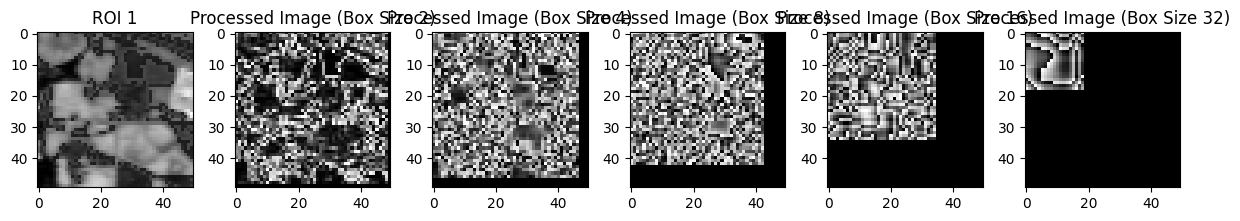

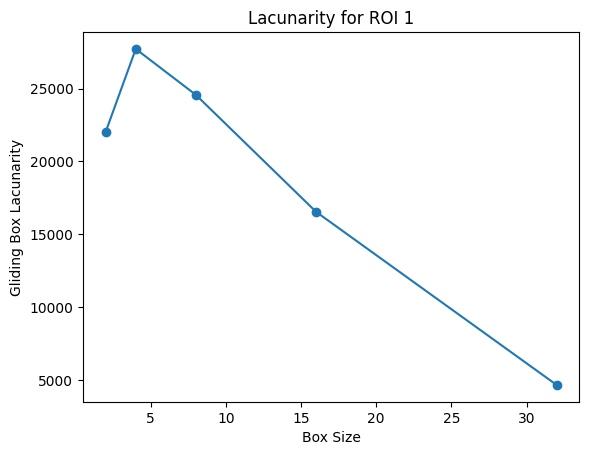

Lacunarity values for ROI 1: [22025.0496, 27718.47, 24562.7832, 16530.9648, 4647.6084]


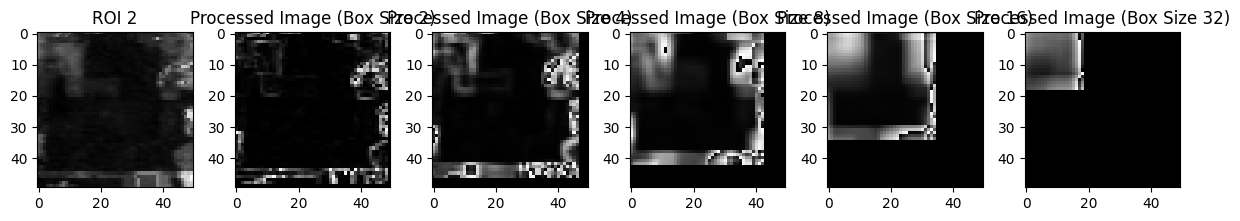

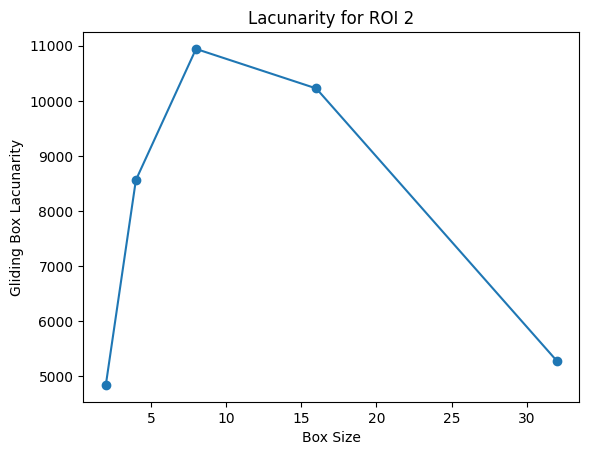

Lacunarity values for ROI 2: [4842.6748, 8561.5168, 10942.0136, 10224.8136, 5281.2568]


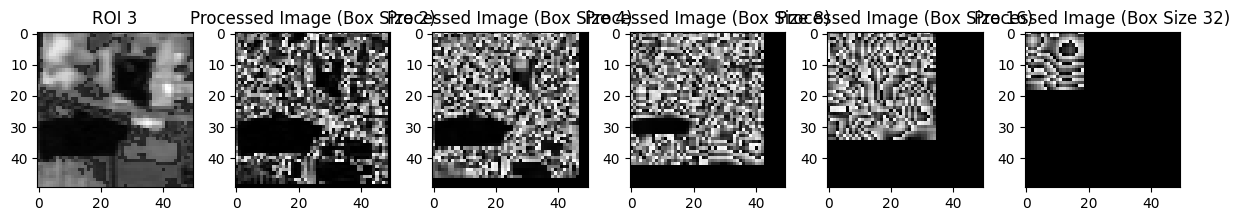

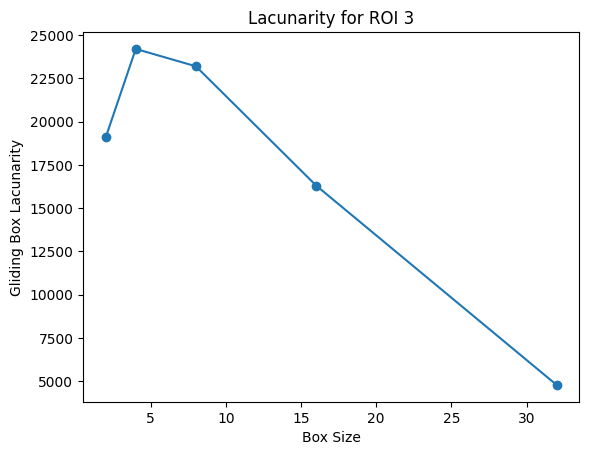

Lacunarity values for ROI 3: [19079.708, 24192.6736, 23189.8016, 16303.5004, 4786.41]


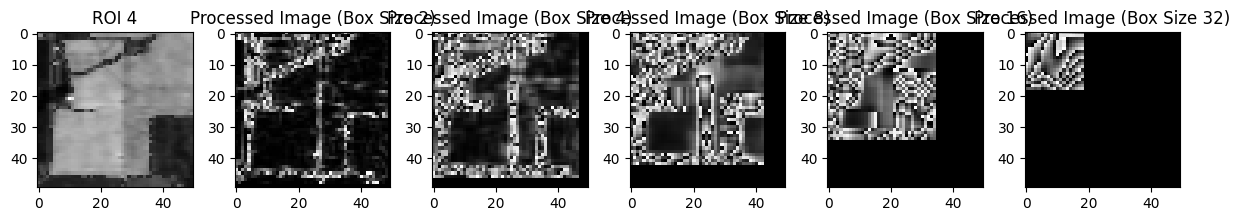

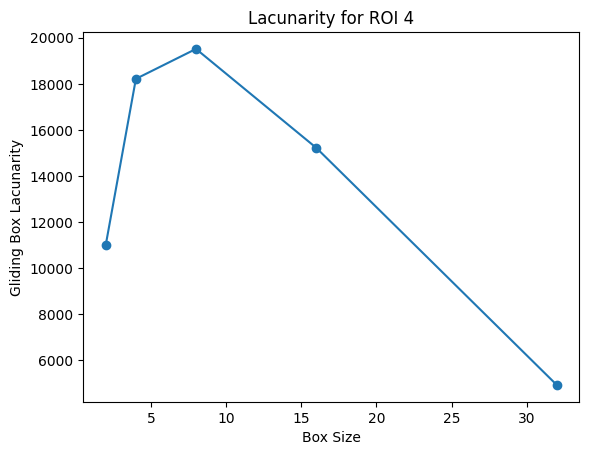

Lacunarity values for ROI 4: [11026.2476, 18214.4776, 19513.5876, 15222.654, 4934.9792]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Function to calculate gliding box lacunarity
def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:  # Exclude background label
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)
                processed_image[i, j] = np.var(sub_img)  # Processed image: example using mean

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images

# Load Indian Pines dataset from MATLAB file
indian_pines_data = loadmat('/content/Indian_pines.mat')  # Update the path
indian_pines = indian_pines_data['indian_pines']  # Adjust based on the structure of your .mat file

# Select band 29
band_number = 29
band_29 = indian_pines[:, :, band_number]

# Get the dimensions of the dataset
height, width = band_29.shape

# Define ROI parameters for different corners
roi_params = [
    {"x": 0, "y": 0, "roi_width": 50, "roi_height": 50},  # Top-left corner
    {"x": 80, "y": 95, "roi_width": 50, "roi_height": 50},  # Bottom-right corner
    {"x": width - 50, "y": 0, "roi_width": 50, "roi_height": 50},  # Upper-right corner
    {"x": 20, "y": 70, "roi_width": 50, "roi_height": 50}
]

# Set up box sizes for lacunarity calculation
box_sizes = [2, 4, 8, 16, 32]

# Calculate lacunarity for each ROI
for idx, params in enumerate(roi_params):
    x, y, roi_width, roi_height = params["x"], params["y"], params["roi_width"], params["roi_height"]
    roi = band_29[y:y+roi_height, x:x+roi_width]

    # Apply gliding box lacunarity algorithm to the ROI
    lacunarity_values, processed_images = gliding_box_lacunarity(roi, box_sizes)

    # Display results for each ROI
    plt.figure(figsize=(12, 4))
    plt.subplot(1, len(box_sizes) + 1, 1)
    plt.imshow(roi, cmap='gray')
    plt.title(f'ROI {idx+1}')

    for i, size in enumerate(box_sizes):
        plt.subplot(1, len(box_sizes) + 1, i+2)
        plt.imshow(processed_images[i], cmap='gray')
        plt.title(f'Processed Image (Box Size {size})')

    plt.tight_layout()
    plt.show()

    # Display lacunarity values
    plt.plot(box_sizes, lacunarity_values, marker='o')
    plt.xlabel('Box Size')
    plt.ylabel('Gliding Box Lacunarity')
    plt.title(f'Lacunarity for ROI {idx+1}')
    plt.show()

    # Print lacunarity values
    print(f'Lacunarity values for ROI {idx+1}: {lacunarity_values}')

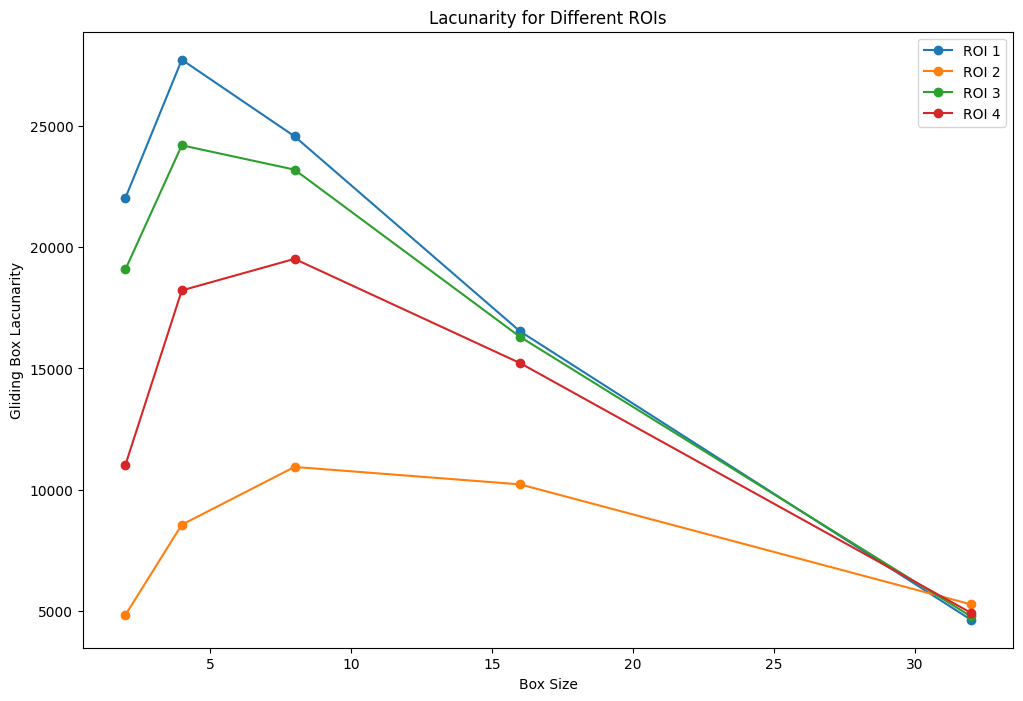

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Function to calculate gliding box lacunarity
def gliding_box_lacunarity(data, box_sizes):
    lacunarity_values = []
    processed_images = []

    for size in box_sizes:
        lacunarity_map = np.zeros_like(data)
        processed_image = np.zeros_like(data)

        for i in range(data.shape[0] - size + 1):
            for j in range(data.shape[1] - size + 1):
                sub_img = data[i:i+size, j:j+size]
                unique_labels = np.unique(sub_img)
                if 0 in unique_labels:  # Exclude background label
                    unique_labels = unique_labels[1:]
                lacunarity_map[i, j] = np.var(unique_labels)
                processed_image[i, j] = np.var(sub_img)  # Processed image: example using mean

        lacunarity_values.append(np.mean(lacunarity_map))
        processed_images.append(processed_image)

    return lacunarity_values, processed_images

# Load Indian Pines dataset from MATLAB file
indian_pines_data = loadmat('/content/Indian_pines.mat')  # Update the path
indian_pines = indian_pines_data['indian_pines']  # Adjust based on the structure of your .mat file

# Select band 29
band_number = 29
band_29 = indian_pines[:, :, band_number]

# Get the dimensions of the dataset
height, width = band_29.shape

# Define ROI parameters for different corners
roi_params = [
    {"x": 0, "y": 0, "roi_width": 50, "roi_height": 50},  # Top-left corner
    {"x": 80, "y": 95, "roi_width": 50, "roi_height": 50},  # Bottom-right corner
    {"x": width - 50, "y": 0, "roi_width": 50, "roi_height": 50},  # Upper-right corner
    {"x": 20, "y": 70, "roi_width": 50, "roi_height": 50}
]

# Set up box sizes for lacunarity calculation
box_sizes = [2, 4, 8, 16, 32]

# Initialize lists to store lacunarity values for each ROI
all_lacunarity_values = []

# Calculate lacunarity for each ROI
for idx, params in enumerate(roi_params):
    x, y, roi_width, roi_height = params["x"], params["y"], params["roi_width"], params["roi_height"]
    roi = band_29[y:y+roi_height, x:x+roi_width]

    # Apply gliding box lacunarity algorithm to the ROI
    lacunarity_values, processed_images = gliding_box_lacunarity(roi, box_sizes)

    # Store lacunarity values for each ROI
    all_lacunarity_values.append(lacunarity_values)

# Plot all lacunarity values together
plt.figure(figsize=(12, 8))

for idx, lacunarity_values in enumerate(all_lacunarity_values):
    plt.plot(box_sizes, lacunarity_values, marker='o', label=f'ROI {idx+1}')

plt.xlabel('Box Size')
plt.ylabel('Gliding Box Lacunarity')
plt.title('Lacunarity for Different ROIs')
plt.legend()
plt.show()